# 6.4 Supervised Machine Learning: Regression - Airbnb Mallorca

## Table of Contents
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# import warnings to avoid future warning messages

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
path = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca'

In [5]:
# importing dataframe

df_selected = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_choromap2.csv'), index_col = False)

In [6]:
df_selected.head()

,Unnamed: 0,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcudia,39.836700,3.151310,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcudia,39.824417,3.114876,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


### 2. Data cleaning

In [7]:
df_selected.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'name', 'picture_url', 'host_since',
       'host_is_superhost', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'nr_of_guests', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months',
       'nr_of_reviews_last30days', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_without_symbol',
       'estimation_booking_category'],
      dtype='object')

In [8]:
# drop the unnamed column

df_selected.drop(df_selected.columns[df_selected.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [9]:
df_selected.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,Entire home,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcudia,39.836700,3.151310,Entire villa,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcudia,39.824417,3.114876,Entire home,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


##### In task 6.1 I kept a few missing values. I am going to check now if I should remove them for this part of the analysis

In [10]:
# finding missing values
df_selected.isnull().sum()

id                             0
listing_url                    0
name                           0
picture_url                    0
host_since                     0
host_is_superhost              0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
nr_of_guests                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
nr_of_reviews_last12months     0
nr_of_reviews_last30days       0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         4
review_scores_cleanliness      5
review_scores_checkin          4
review_sco

##### I am going to remove the 4 missing values of review scores location as I might use this variable for this task

In [11]:
df_selected.dropna(subset = ['review_scores_location'], inplace = True)

In [12]:
# checking the missing values
df_selected.isnull().sum()

id                             0
listing_url                    0
name                           0
picture_url                    0
host_since                     0
host_is_superhost              0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
nr_of_guests                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
nr_of_reviews_last12months     0
nr_of_reviews_last30days       0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      1
review_scores_checkin          0
review_sco

##### Extreme values checks

C:\Users\svand\AppData\Local\Temp\ipykernel_21796\579171102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_selected['price_without_symbol'], bins=25) # Shows extreme values


<Axes: xlabel='price_without_symbol', ylabel='Density'>

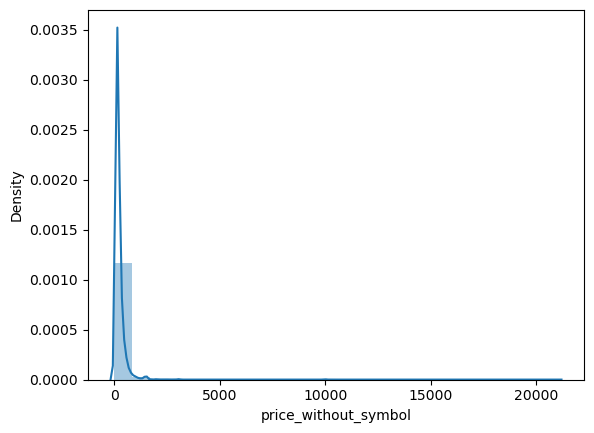

In [13]:
sns.distplot(df_selected['price_without_symbol'], bins=25) # Shows extreme values


In [14]:
# Show prices more than 2000
df_selected[df_selected['price_without_symbol'] > 2000]

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
174,15883281,https://www.airbnb.com/rooms/15883281,Churruca,https://a0.muscache.com/pictures/prohost-api/H...,2016-11-08,f,Llucmajor,39.429320,2.753430,Entire villa,...,4.00,4.18,4.35,3.71,3.65,4.06,4.00,0.21,3050.0,average in bookings
654,49742470,https://www.airbnb.com/rooms/49742470,3 pièces 6 personnes 165285,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Calvia,39.512780,2.480330,Entire rental unit,...,4.19,4.19,4.25,4.38,4.06,4.75,4.50,0.49,9999.0,low in bookings
879,48708110,https://www.airbnb.com/rooms/48708110,cerrada,https://a0.muscache.com/pictures/5425e530-e631...,2021-03-17,f,Capdepera,39.685400,3.447690,Entire condo,...,5.00,5.00,5.00,5.00,5.00,4.50,4.50,0.06,3000.0,low in bookings
927,49742459,https://www.airbnb.com/rooms/49742459,3 Pièces 6 Personnes Standard 145497,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Felanitx,39.409280,3.258850,Entire rental unit,...,4.00,4.00,5.00,5.00,2.00,5.00,4.00,0.06,9999.0,low in bookings
1223,965015,https://www.airbnb.com/rooms/965015,Casa Pili,https://a0.muscache.com/pictures/e69565cc-f64d...,2013-02-28,f,Felanitx,39.477990,3.180160,Entire cottage,...,4.82,4.80,4.55,5.00,5.00,4.60,4.80,0.12,2462.0,low in bookings
1512,42830478,https://www.airbnb.com/rooms/42830478,Can Bi,https://a0.muscache.com/pictures/prohost-api/H...,2016-11-08,f,Soller,39.787650,2.691000,Entire villa,...,4.50,4.00,4.50,4.75,5.00,4.75,4.50,0.12,3050.0,low in bookings
1706,48169090,https://www.airbnb.com/rooms/48169090,Es Rafal ETV/15726 Perfectfinca,https://a0.muscache.com/pictures/miso/Hosting-...,2016-02-09,f,Alaro,39.710340,2.793560,Entire villa,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.17,3500.0,low in bookings
1884,712039143960659563,https://www.airbnb.com/rooms/712039143960659563,Villa with breathtaking views over the port,https://a0.muscache.com/pictures/miso/Hosting-...,2022-09-09,f,Andratx,39.540690,2.395110,Entire villa,...,5.00,4.50,5.00,4.50,5.00,5.00,4.50,0.27,2714.0,low in bookings
1904,31610874,https://www.airbnb.com/rooms/31610874,Villa Margarita,https://a0.muscache.com/pictures/prohost-api/H...,2016-11-08,f,Calvia,39.523190,2.484770,Entire villa,...,4.36,4.55,4.36,5.00,4.82,4.55,4.36,0.19,3125.0,average in bookings
1980,37317021,https://www.airbnb.com/rooms/37317021,Casa Feliz,https://a0.muscache.com/pictures/da0a02ce-a43c...,2018-06-27,f,Manacor,39.547880,3.308630,Entire villa,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05,2083.0,low in bookings


##### details show that a few listings below 4000 are still average in the number of bookings

In [15]:
# Show prices more than 4000
df_selected[df_selected['price_without_symbol'] > 4000]

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
654,49742470,https://www.airbnb.com/rooms/49742470,3 pièces 6 personnes 165285,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Calvia,39.512780,2.480330,Entire rental unit,...,4.19,4.19,4.25,4.38,4.06,4.75,4.50,0.49,9999.0,low in bookings
927,49742459,https://www.airbnb.com/rooms/49742459,3 Pièces 6 Personnes Standard 145497,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Felanitx,39.409280,3.258850,Entire rental unit,...,4.00,4.00,5.00,5.00,2.00,5.00,4.00,0.06,9999.0,low in bookings
2848,49742475,https://www.airbnb.com/rooms/49742475,Chambre Double Standard Climatisée 165734,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Felanitx,39.408980,3.257390,Entire rental unit,...,4.50,4.60,4.50,4.70,4.50,4.80,4.30,0.43,9999.0,low in bookings
3169,1066064065631194122,https://www.airbnb.com/rooms/1066064065631194122,The dream valley,https://a0.muscache.com/pictures/hosting/Hosti...,2015-10-01,t,Pollensa,39.878176,3.013816,Entire home,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.43,9000.0,low in bookings
10289,49742464,https://www.airbnb.com/rooms/49742464,3 Pièces 5 Personnes Vue Mer 165255,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Calvia,39.518540,2.482020,Entire rental unit,...,4.25,4.00,4.00,4.75,4.75,4.50,3.75,0.18,9999.0,low in bookings
10409,49742458,https://www.airbnb.com/rooms/49742458,2 Pièces 4 Personnes Standard 145496,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,f,Felanitx,39.408620,3.257540,Entire rental unit,...,4.71,4.71,4.86,4.86,4.57,4.43,4.86,0.30,9999.0,low in bookings
10514,22761592,https://www.airbnb.com/rooms/22761592,Belvilla by OYO Son Pelai,https://a0.muscache.com/pictures/2d79d20c-2c3c...,2017-03-23,f,Lloseta,39.716530,2.857040,Entire home,...,5.00,4.50,4.50,5.00,5.00,5.00,4.00,0.03,16800.0,low in bookings
11404,22761601,https://www.airbnb.com/rooms/22761601,Apartment in sea roquetas with balcony/terrace,https://a0.muscache.com/pictures/prohost-api/H...,2017-03-23,f,Campos,39.364380,2.990490,Entire home,...,5.00,4.00,4.00,5.00,5.00,5.00,5.00,0.02,21000.0,low in bookings


##### Only 9 listings are above 4000 euros and they are low in bookings. As these are extreme outliers I will remove them for the purpose of this task 

In [16]:
# Clean the extreme values from the "Price without symbol": 

df_regression = df_selected[df_selected['price_without_symbol'] < 4000]

In [17]:
df_selected.shape

(11973, 36)

In [18]:
df_regression.shape

(11964, 36)

C:\Users\svand\AppData\Local\Temp\ipykernel_21796\1098055709.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_regression['price_without_symbol'], bins=25)


<Axes: xlabel='price_without_symbol', ylabel='Density'>

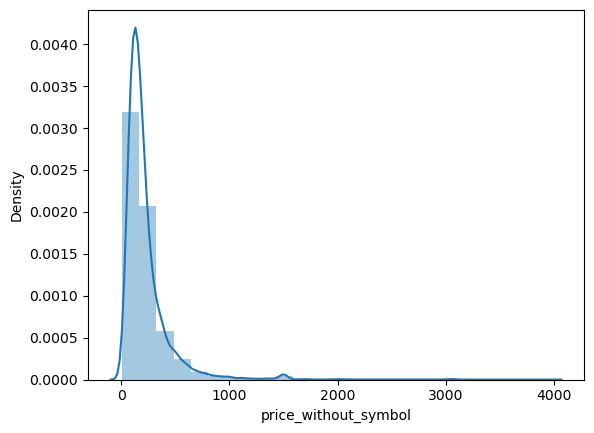

In [19]:
# checking the regression dataframe prices:

sns.distplot(df_regression['price_without_symbol'], bins=25) 

### 3. Data prep for regression analysis 

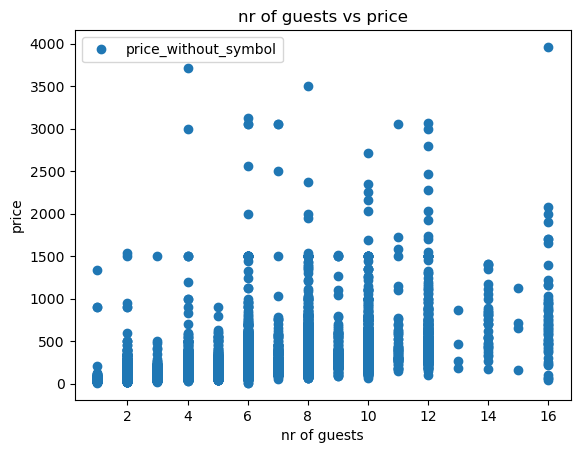

In [20]:
# Create a scatterplot of price and nr of guests using matplotlib.

df_regression.plot(x = 'nr_of_guests', y='price_without_symbol',style='o') 
plt.title('nr of guests vs price')  
plt.xlabel('nr of guests')  
plt.ylabel('price')  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_guests_price.png')) # save figure
plt.show()

##### The scatterplot already shows there is no relation between the nr of guests and the price of a listing. So the hypothesis I created in task 6.2; If the price of a listing is high, then the maximum number of guests is also high, contradicts with the result.

C:\Users\svand\AppData\Local\Temp\ipykernel_21796\3830122347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_regression['review_scores_location'], bins=25)


<Axes: xlabel='review_scores_location', ylabel='Density'>

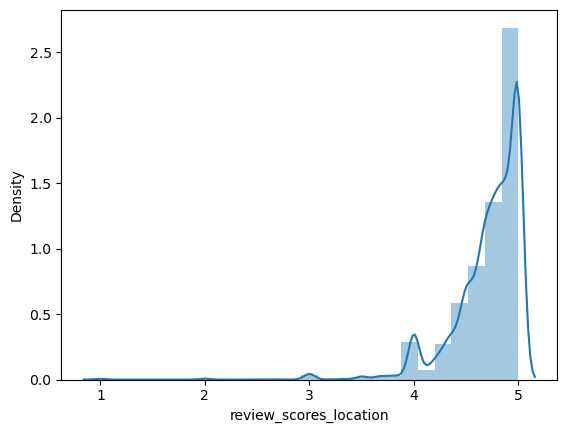

In [21]:
# checking the values of review scores location:

sns.distplot(df_regression['review_scores_location'], bins=25) 

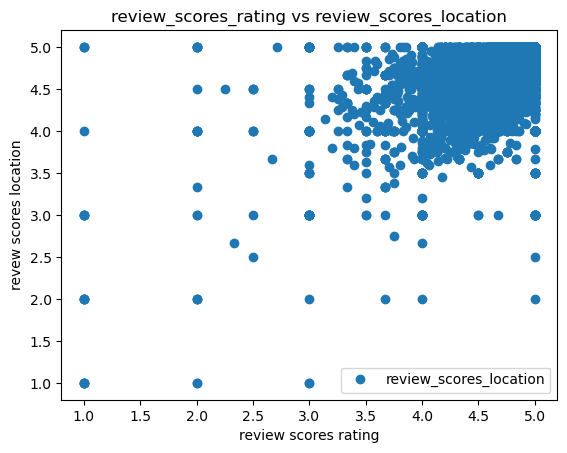

In [22]:
# Create a scatterplot of review scores rating and review scores location using matplotlib (with the full dataframe).

df_selected.plot(x = 'review_scores_rating', y='review_scores_location',style='o') 
plt.title('review_scores_rating vs review_scores_location')  
plt.xlabel('review scores rating')  
plt.ylabel('revew scores location')  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_rating_location.png')) # save figure
plt.show()

### Hypotheses to check: If the review scores rating is higher, then the review scores of the location are also higher

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_selected['review_scores_rating'].values.reshape(-1,1)
y = df_selected['review_scores_location'].values.reshape(-1,1)

In [24]:
X

array([[4.56],
       [5.  ],
       [5.  ],
       ...,
       [4.8 ],
       [4.94],
       [5.  ]])

In [25]:
y

array([[4.94],
       [5.  ],
       [5.  ],
       ...,
       [4.8 ],
       [4.94],
       [5.  ]])

In [26]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [27]:
# Creating a regression object.

regression = LinearRegression()

In [28]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

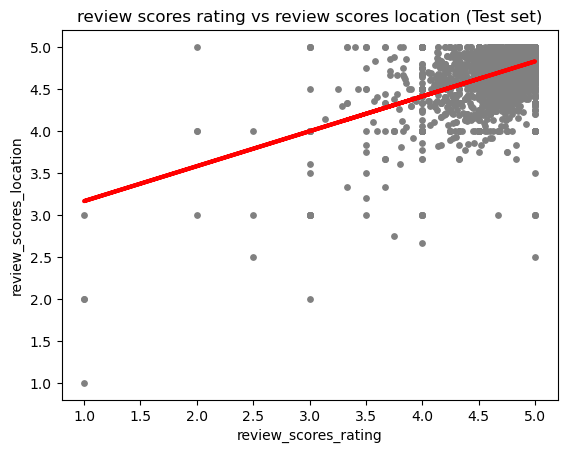

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('review scores rating vs review scores location (Test set)')
plot_test.xlabel('review_scores_rating')
plot_test.ylabel('review_scores_location')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_testset_rating_location.png')) # save figure
plot_test.show()

##### the plot shows that most points (listings) are scoring high in rating for both variables and that they are fairly close to the regression line. However, the are as well a fair number of points that are far from the regression line and are outliers.

In [31]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [32]:
# Printing the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41587658]]
Mean squared error:  0.0853959069048839
R2 score:  0.24999344262717793


##### The slope indicates that when the review score ratings get higher, the review scores of the location get also slightly higher. 
##### The MSE is very small, which means that the regression line passes fairly close to the observations, making it a good fit.
##### The R2 hower is 0.25 which can be seen as 25% which indicates it is not a good fit

In [33]:
y_predicted

array([[4.13170276],
       [4.72640627],
       [4.77631146],
       ...,
       [4.77631146],
       [4.82621665],
       [4.62659589]])

In [34]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.00,4.131703
1,4.50,4.726406
2,4.88,4.776311
3,5.00,4.826217
4,5.00,4.772153
5,5.00,4.826217
6,4.63,4.776311
7,4.65,4.718089
8,4.80,4.743041
9,4.60,4.493515


##### As we are dealing with ratings between 1 and 5, from which most of them are between 4 and 5, there is not a lot of difference there can be between the actual and the predicted values. However, I can see there are big differences which shows the model is not a good fit for these variables.

In [36]:
df_v6 = df_selected

##### I am going to check if the regression algorithm model can be used for comparing the reviews of the last 12 months and the reviews per month

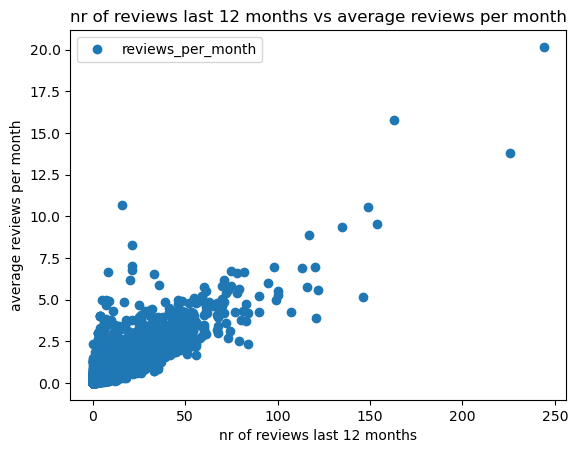

In [37]:
# Create a scatterplot of nr of reviews last 12 months and reviews per month using matplotlib (with the full dataframe).

df_v6.plot(x = 'nr_of_reviews_last12months', y='reviews_per_month',style='o') 
plt.title('nr of reviews last 12 months vs average reviews per month')  
plt.xlabel('nr of reviews last 12 months')  
plt.ylabel('average reviews per month')  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_nrreviews.png')) # save figure
plt.show()

### Hypotheses to check: If the number of reviews in the last 12 months is higher, the average number of reviews over all years are also higher

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_v6['nr_of_reviews_last12months'].values.reshape(-1,1)
y = df_v6['reviews_per_month'].values.reshape(-1,1)

In [40]:
X

array([[3],
       [1],
       [4],
       ...,
       [1],
       [8],
       [1]], dtype=int64)

In [41]:
y

array([[0.23],
       [0.09],
       [0.47],
       ...,
       [0.44],
       [0.35],
       [0.18]])

In [42]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
# Creating a regression object.

regression = LinearRegression()

In [44]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

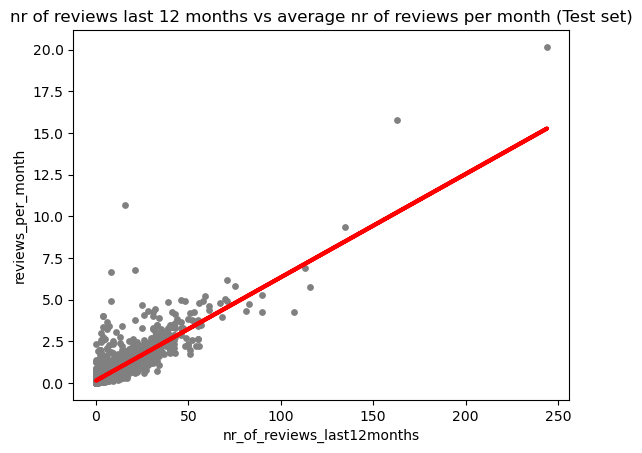

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('nr of reviews last 12 months vs average nr of reviews per month (Test set)')
plot_test.xlabel('nr_of_reviews_last12months')
plot_test.ylabel('reviews_per_month')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_testset_reviews.png')) # save figure
plot_test.show()

##### Almost all point are really close to the regression line. Except a handful.

In [47]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [48]:
# Printing the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06198736]]
Mean squared error:  0.20354412607858946
R2 score:  0.7423511833206357


##### The slope indicates that when the review score ratings get higher, the review scores of the location get also slightly higher. 
##### The MSE is very small, which means that the regression line passes fairly close to the observations, making it a good fit.
##### The R2 hower is 0.74 which can be seen as 74% which indicates it is a good fit

In [49]:
y_predicted

array([[0.19846537],
       [0.88032631],
       [0.4464148 ],
       ...,
       [0.75635159],
       [0.26045273],
       [0.32244009]])

In [50]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.14,0.198465
1,1.14,0.880326
2,0.14,0.446415
3,0.79,0.632377
4,0.26,0.260453
5,0.06,0.136478
6,0.07,0.136478
7,0.42,0.136478
8,0.23,0.260453
9,0.07,0.198465


##### Right of the bat I can see the model isn’t doing a great job of explaining the relationship. The predicted values are too far from the actual values 

In [51]:
#export dataset

df_v6.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_v6.csv'))